In [1]:
# !pip install scikit-learn
import sklearn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
wine=datasets.load_wine()

#EDA

## EDA

In [4]:
df=pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [6]:
df["alcohol"]

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [7]:
df["label"]=wine.target
df.head(n=10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [8]:
df.tail(n=10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0,2


In [9]:
df["label"].value_counts()

label
1    71
0    59
2    48
Name: count, dtype: int64

In [10]:
df["label"].value_counts(normalize=True)

label
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

### check missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

<Axes: >

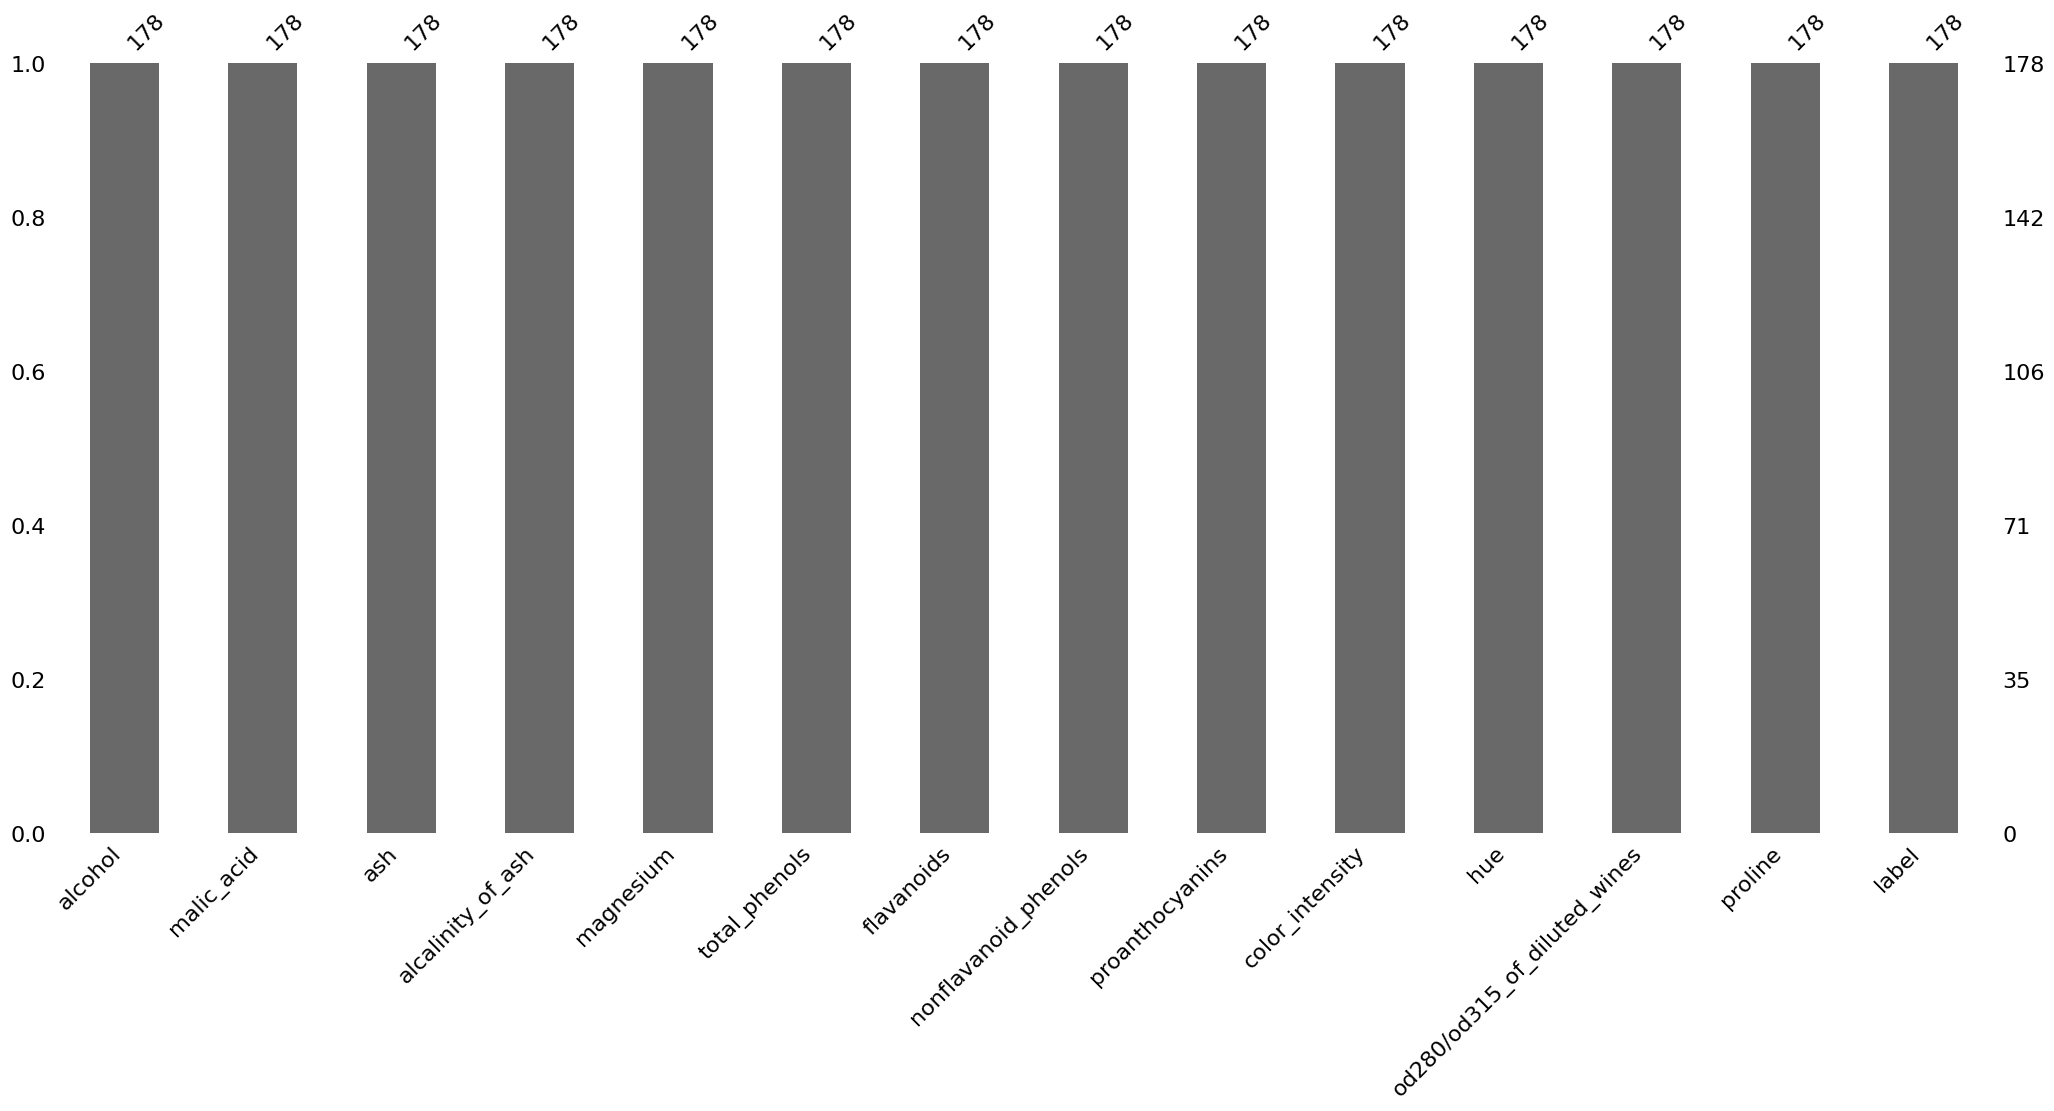

In [12]:
import missingno as msno
msno.bar(df)

In [13]:
#!pip install missingno

### corelation

In [14]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [15]:
corr=df.iloc[:,:-1].corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<Axes: >

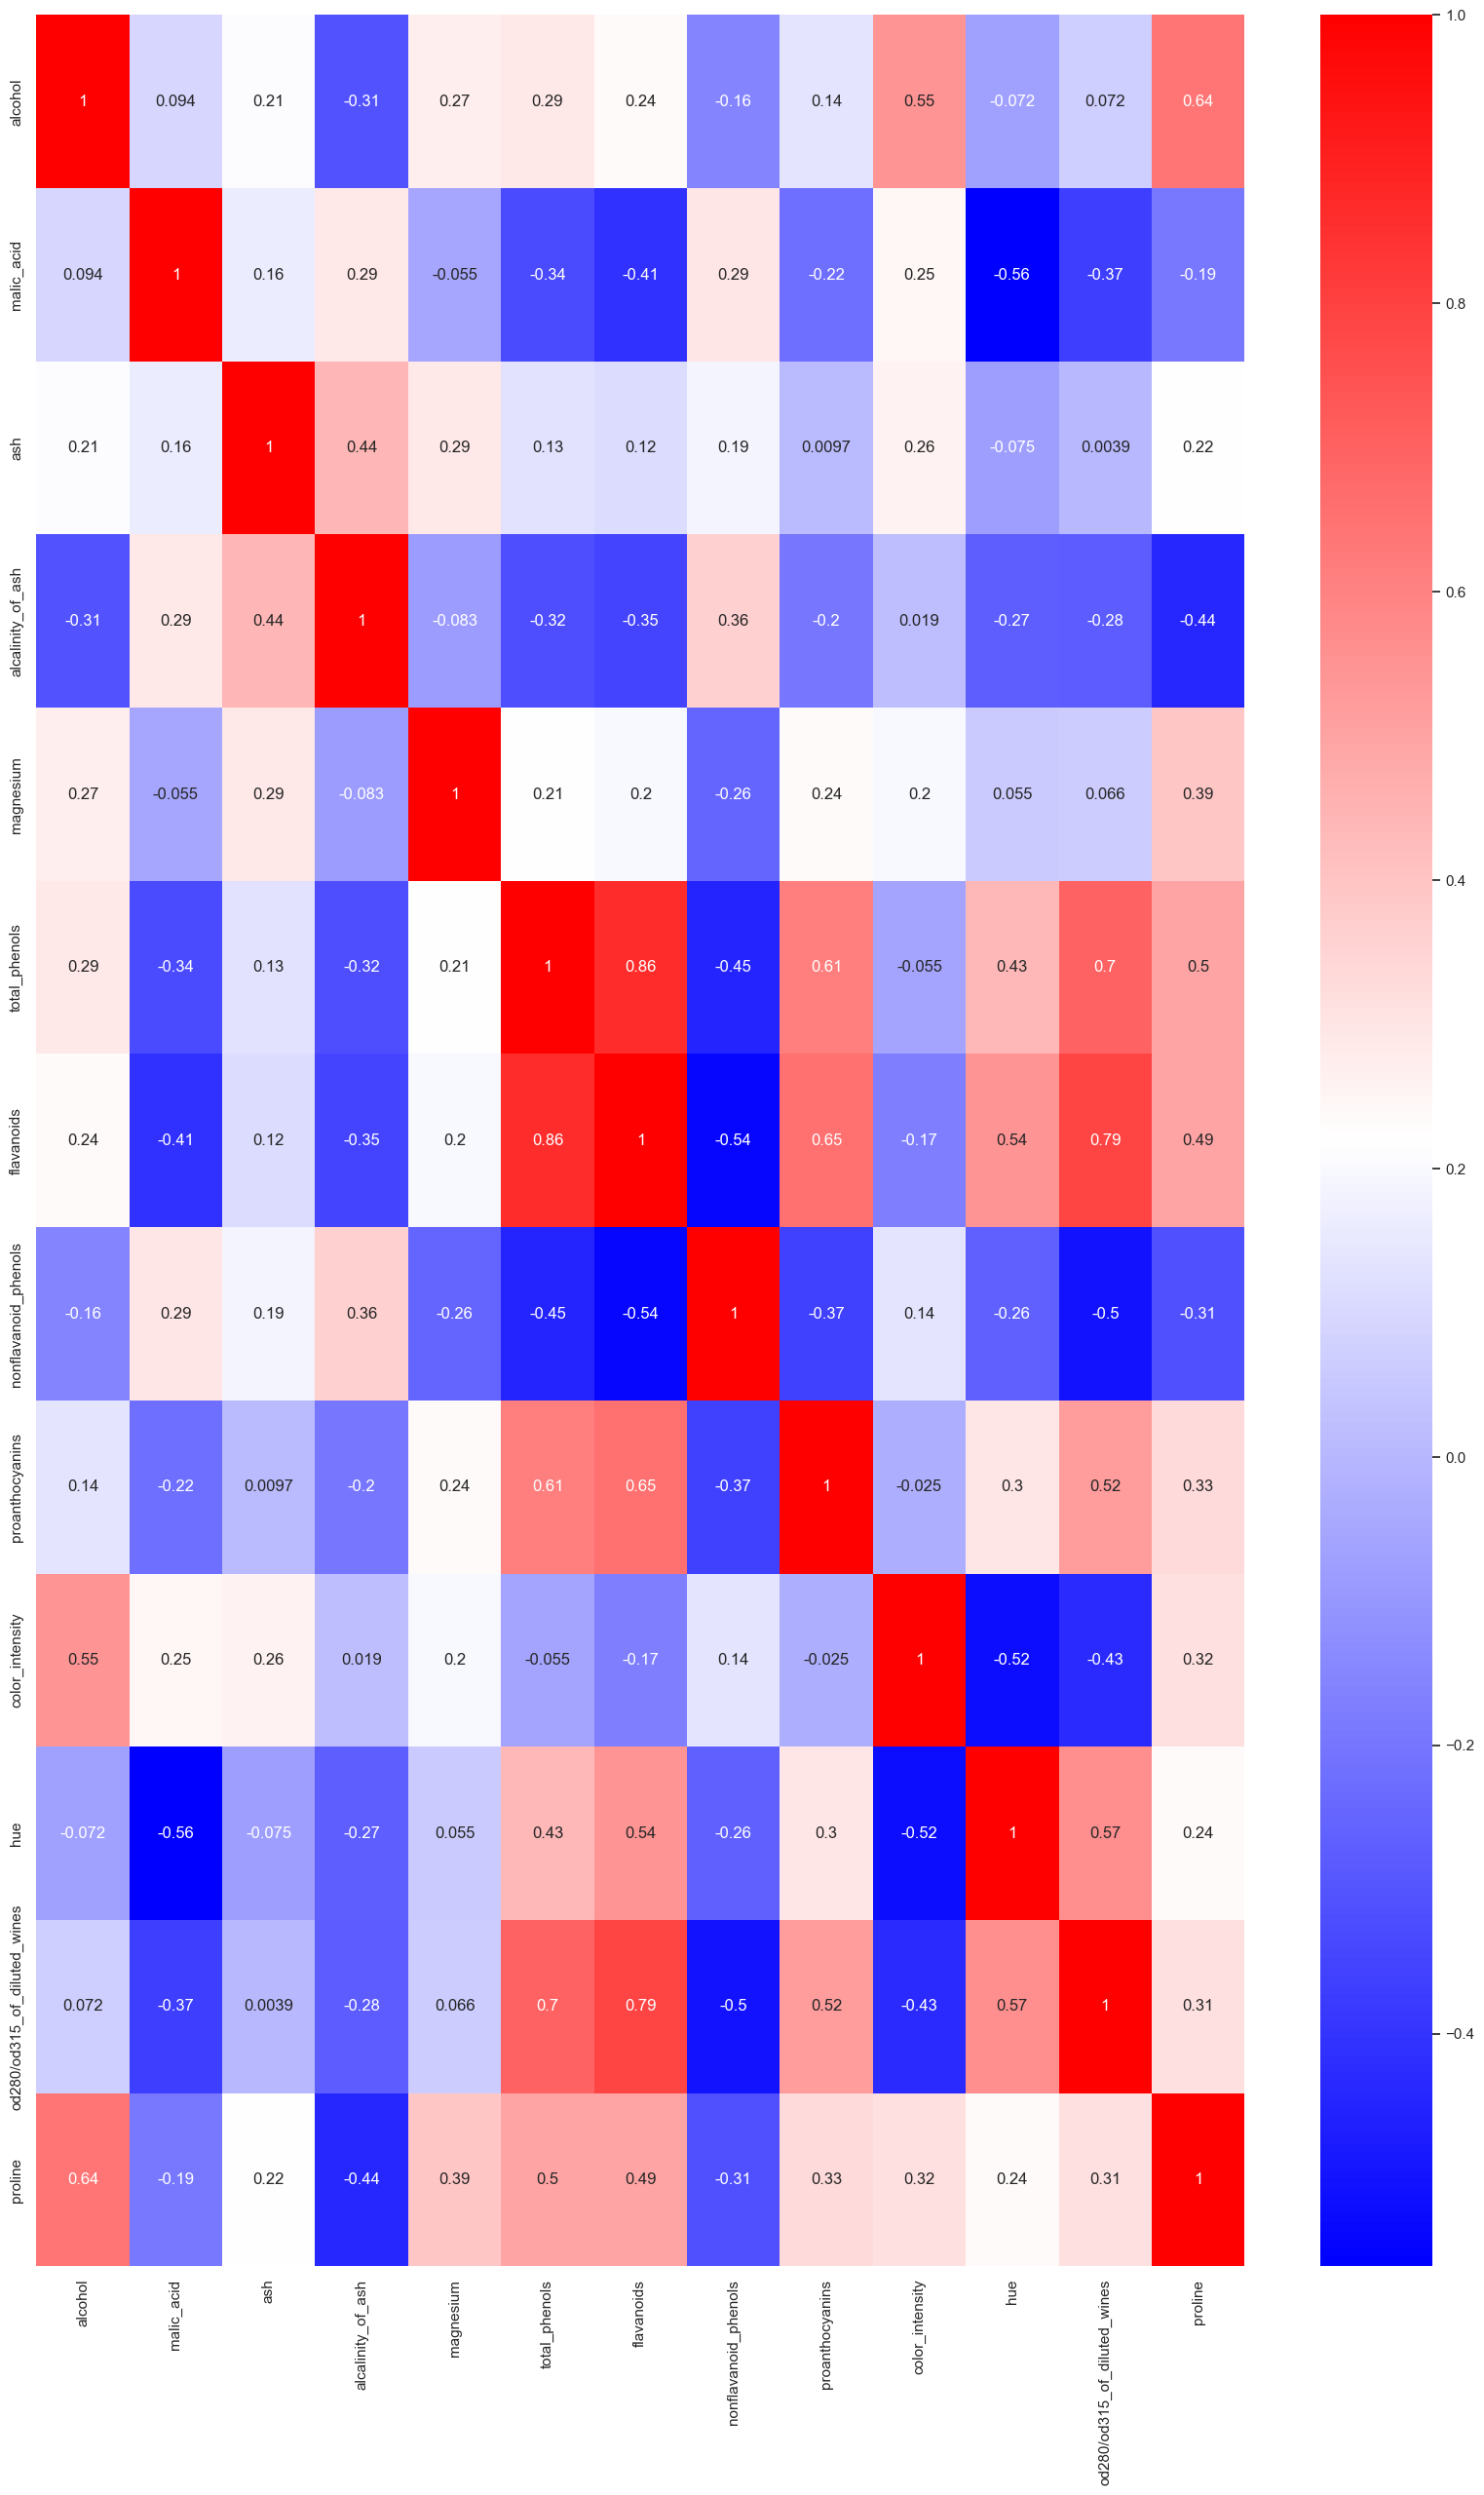

In [16]:
sn.set(rc={
    "figure.figsize":(20, 30)
})
    
sn.heatmap(corr, annot=True, cmap="bwr")

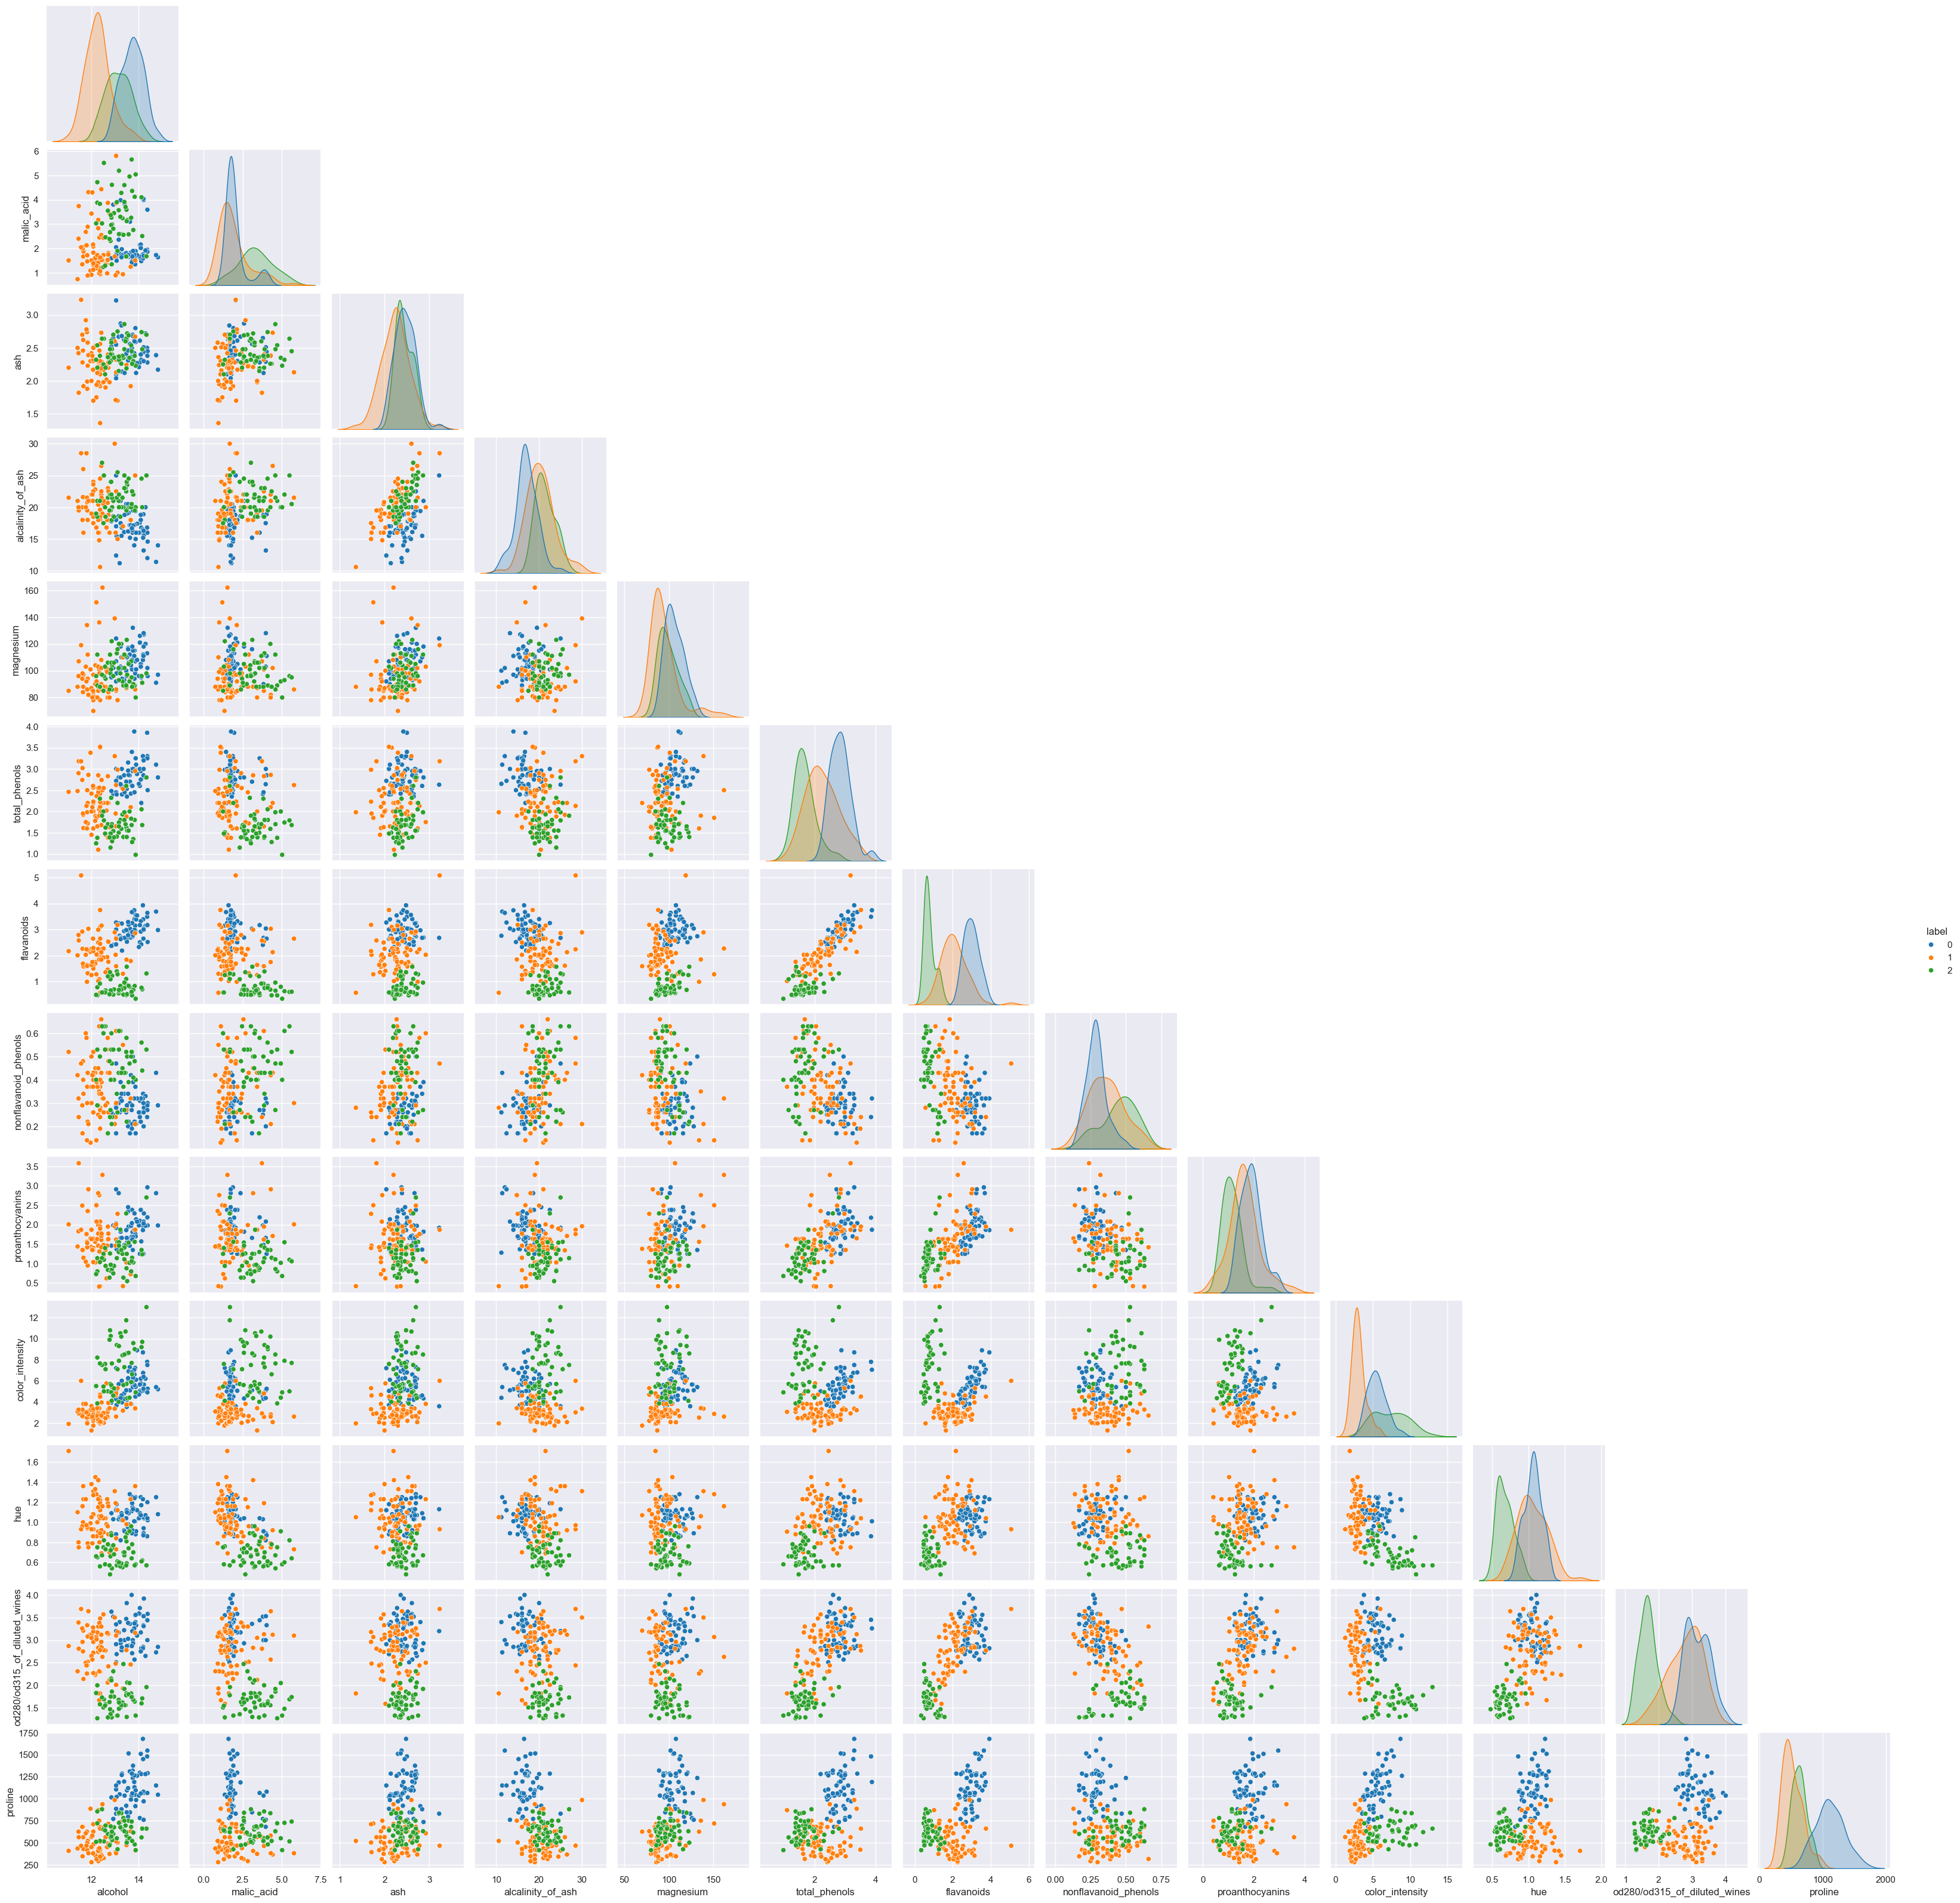

In [17]:
sn.pairplot(df, hue="label", palette="tab10", corner=True)

In [18]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000,0.000000
5%,11.658500,1.061000,1.920000,14.770000,80.850000,1.380000,0.545500,0.190000,0.730000,2.114000,0.570000,1.462500,354.550000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
95%,14.221500,4.455500,2.741500,25.000000,124.300000,3.274500,3.497500,0.600000,2.709000,9.598000,1.284500,3.580000,1297.250000,2.000000


In [19]:
minmax=preprocessing.MinMaxScaler()

In [20]:
X=df.drop("label", axis=1).values
Y=df["label"].values

In [21]:
X_sc=minmax.fit_transform(X)

In [22]:
df.describe().loc[["min", "max"]].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


### decompositiom

In [23]:
pca=PCA()

In [24]:
pca.fit(X_sc)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [25]:
X_sc.shape

(178, 13)

In [26]:
pca_range=np.arange(1, X_sc.shape[1]+1)
pca_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

Text(0.5, 1.0, 'Principal Components & Variante')

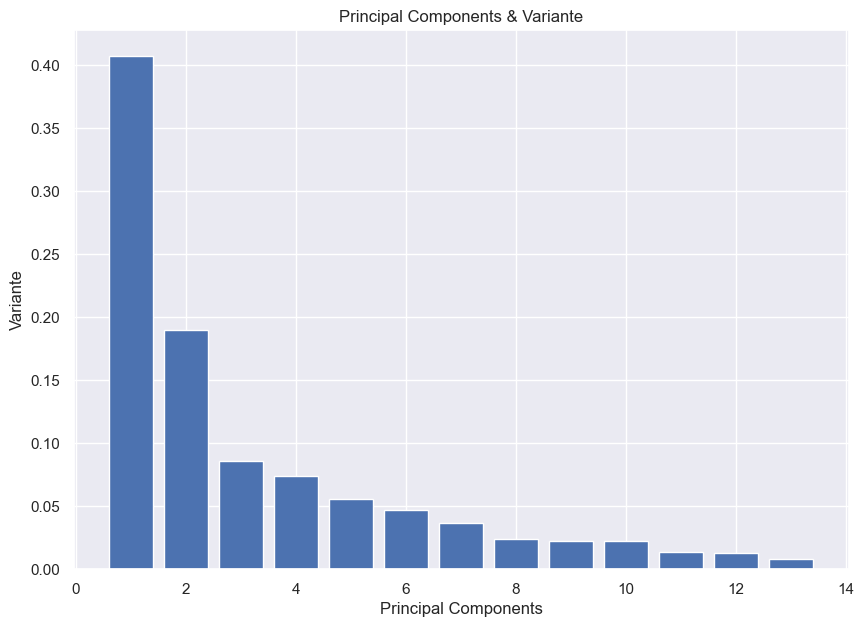

In [27]:
plt.figure(figsize=(10, 7))
plt.bar(pca_range, pca.explained_variance_ratio_)

plt.xlabel("Principal Components")
plt.ylabel("Variante")
plt.title("Principal Components & Variante")

### train test

In [28]:
X_train, x_test, y_train, y_test=split(X, Y, test_size=0.25, shuffle=True, random_state=42)

In [29]:
scaler = preprocessing.MinMaxScaler()

In [30]:
X_train=scaler.fit_transform(X_train)

In [31]:
x_test=scaler.transform(x_test)

### train SVC

In [32]:
model=SVC()

In [33]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
predictions=model.predict(x_test)

In [35]:
predictions

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [36]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [37]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [38]:
confusion_matrix(y_test, predictions)

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 12]])

### train NN


In [39]:
#!pip install torch

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

In [41]:
torch.manual_seed(21)

In [42]:
torch.cuda.is_available()

False

In [43]:
device="cpu"

In [44]:
X_train.shape

(133, 13)

In [45]:

X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(x_test,dtype=torch.float32)
Y_train=torch.tensor(y_train)
Y_test=torch.tensor(y_test)

In [96]:
model=nn.Sequential(
    nn.Linear(13,3),
)

In [47]:
cryterial=nn.CrossEntropyLoss()

In [94]:
optimizer=optim.Adam(model.parameters(),lr=1)

In [97]:
epohs=10000
B_s=500
for epoh in range(1,epohs+1):
    model.train()
    X_train=X_train[torch.randperm(X_train.shape[0])]
    running_loss=0
    for start in range(0,X_train.shape[0],B_s):
        x_b=X_train[start:start+B_s]
        y_b=Y_train[start:start+B_s]
        optimizer.zero_grad()
        preds=model(x_b)
        loss=cryterial(preds,y_b)
        loss.backward()
        optimizer.step()
        print(epoh,start,loss.item())
    

1 0 1.0829081535339355
2 0 1.0907787084579468
3 0 1.0896600484848022
4 0 1.0924590826034546
5 0 1.087172508239746
6 0 1.084581732749939
7 0 1.1008304357528687
8 0 1.0935317277908325
9 0 1.0917892456054688
10 0 1.0868443250656128
11 0 1.090294361114502
12 0 1.0893151760101318
13 0 1.092210054397583
14 0 1.0877509117126465
15 0 1.0790603160858154
16 0 1.0845657587051392
17 0 1.0921409130096436
18 0 1.0901567935943604
19 0 1.0841026306152344
20 0 1.0816539525985718
21 0 1.086203694343567
22 0 1.0841645002365112
23 0 1.083094835281372
24 0 1.091597080230713
25 0 1.089666485786438
26 0 1.0951553583145142
27 0 1.0922256708145142
28 0 1.0921134948730469
29 0 1.0937342643737793
30 0 1.0886287689208984
31 0 1.0890215635299683
32 0 1.0922006368637085
33 0 1.0903232097625732
34 0 1.0937637090682983
35 0 1.08206307888031
36 0 1.0953420400619507
37 0 1.090367317199707
38 0 1.0848997831344604
39 0 1.0839312076568604
40 0 1.0900799036026
41 0 1.082653284072876
42 0 1.0885621309280396
43 0 1.095823645

In [98]:
X_train.shape[0]

133

In [99]:
model.eval()

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
)

In [100]:
with torch.no_grad():
    preds=model(X_test)

In [101]:
preds

tensor([[ 0.0944,  0.1320, -0.1482],
        [ 0.1888,  0.1942, -0.2482],
        [ 0.1600,  0.1902, -0.0770],
        [-0.0495,  0.1874, -0.3274],
        [ 0.1174,  0.2547, -0.0523],
        [ 0.0383,  0.1303, -0.3212],
        [ 0.1900,  0.3363, -0.0360],
        [ 0.0092,  0.1231, -0.1995],
        [-0.0364,  0.3102, -0.1106],
        [ 0.1141,  0.1501, -0.1276],
        [ 0.1559,  0.2077, -0.1403],
        [-0.0764, -0.0488, -0.1948],
        [ 0.1224,  0.2670, -0.2225],
        [ 0.1483,  0.2926, -0.0559],
        [ 0.0245,  0.1266, -0.2391],
        [ 0.1231,  0.2691, -0.0834],
        [ 0.0078,  0.2943, -0.0557],
        [ 0.1149,  0.2523, -0.0558],
        [-0.0071,  0.2028, -0.2471],
        [ 0.1240,  0.3339, -0.0850],
        [-0.0534,  0.2013, -0.4025],
        [-0.0160,  0.3209, -0.1467],
        [ 0.2054,  0.2612, -0.0406],
        [-0.0201,  0.0077, -0.1731],
        [-0.0702,  0.1609, -0.1318],
        [-0.0351,  0.0856, -0.1895],
        [ 0.2001,  0.2070, -0.0417],
 

In [102]:
#very hot potato

In [103]:
preds.argmax(axis=1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [104]:
confusion_matrix(y_test, preds.argmax(axis=1))

array([[ 0, 15,  0],
       [ 0, 18,  0],
       [ 1, 11,  0]])

In [105]:
print (classification_report(y_test, preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.41      1.00      0.58        18
           2       0.00      0.00      0.00        12

    accuracy                           0.40        45
   macro avg       0.14      0.33      0.19        45
weighted avg       0.16      0.40      0.23        45



C:\Users\yari4\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\yari4\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\yari4\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [106]:
torch.randperm(X_train.shape[0])

tensor([ 48,  46, 100,   2,   9,  57,  72,  99,   0,  47,  42,  41,  58, 105,
          7,  13,  82, 117,  66,  97,  35,  24,  19,  28,  31,  49,  38,  54,
        103,  85,  71,  70, 124,  74, 119,  79, 107,  36,  61, 132,   1,  63,
         81,  51, 129,  95, 104,  86, 102,  60, 116, 115, 131,  45,  43,  96,
          5,  52, 121,  98,  39,  78, 110,  16, 120,  69,  56,  55,  34, 118,
        112,  26,  73,  91,  33,  27,  17,  88, 128,  53,  62, 106, 125, 130,
         75, 127,  67,  10,  23,  84,  18, 108,  32, 113,  37,  21,  59,  15,
         93, 109, 126,  22, 123,  44,  12,  77,  29,  65,   8,  76, 101,   6,
         64,  87,  68,  83, 122,  30,  94,  14,  25, 111,  11,  89,  20,  40,
         90,   3,   4,  92, 114,  80,  50])

In [107]:
X_train[torch.randperm(X_train.shape[0])]

tensor([[0.7500, 0.8452, 0.4652,  ..., 0.0813, 0.0220, 0.1080],
        [0.5000, 0.5927, 0.6898,  ..., 0.4472, 0.8242, 0.3877],
        [0.4789, 0.4847, 0.6524,  ..., 0.3171, 0.3077, 0.2301],
        ...,
        [0.1921, 0.3646, 0.8342,  ..., 0.6098, 0.4505, 0.2593],
        [0.6711, 0.3442, 0.7112,  ..., 0.2114, 0.1941, 0.3719],
        [0.1132, 0.5804, 0.2460,  ..., 0.2195, 0.5641, 0.2238]])

In [108]:
X_train

tensor([[0.5316, 0.2363, 0.9947,  ..., 0.5285, 0.7070, 0.4350],
        [0.3211, 0.6090, 0.4492,  ..., 0.1382, 0.2674, 0.4547],
        [0.6974, 0.1914, 0.5348,  ..., 0.6098, 0.5861, 0.5611],
        ...,
        [0.6947, 0.0733, 0.2995,  ..., 0.6098, 0.4359, 0.2774],
        [0.2553, 0.1263, 0.5668,  ..., 0.4634, 0.5055, 0.1355],
        [0.5474, 0.2057, 0.7433,  ..., 0.1057, 0.0220, 0.1158]])